LIBRARIES

In [96]:
import seaborn as sns

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [98]:
import datetime as dt
from scipy import stats
import numpy as np

DATA ANALYSIS & CLEANING

In [99]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [100]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [101]:
client_df.isna().sum().sum()

0

In [102]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [103]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [104]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [105]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [106]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [107]:
client_df.isna().sum().sum()

0

In [108]:

price_df.isna().sum().sum()

0

In [109]:
data = client_df.merge(price_df, how = 'left', on = 'id')

In [110]:
#churn.columns = ['id','churn']
#churn

In [111]:
#data = data.merge(churn,how = 'left',on ='id')

In [112]:
#Moving column churn to the last column as it is a target variable

column_order = [col for col in data.columns if col != 'churn'] + ['churn']
data = data[column_order]

In [113]:
data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,1


In [114]:
data.isna().sum().sum()

0

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

In [116]:
#checking duplicates
data.duplicated().sum()

0

In [117]:
data.select_dtypes(include=['object'])

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up,price_date
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw,2015-01-01
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw,2015-02-01
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw,2015-03-01
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw,2015-04-01
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw,2015-05-01
...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,2009-12-18,2016-12-17,2009-12-18,2015-12-21,f,ldkssxwpmemidmecebumciepifcamkci,2015-08-01
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,2009-12-18,2016-12-17,2009-12-18,2015-12-21,f,ldkssxwpmemidmecebumciepifcamkci,2015-09-01
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,2009-12-18,2016-12-17,2009-12-18,2015-12-21,f,ldkssxwpmemidmecebumciepifcamkci,2015-10-01
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,2009-12-18,2016-12-17,2009-12-18,2015-12-21,f,ldkssxwpmemidmecebumciepifcamkci,2015-11-01


In [118]:
data[['channel_sales','has_gas', 'origin_up']].nunique()

channel_sales    8
has_gas          2
origin_up        6
dtype: int64

In [119]:
#Changing to category type

data[['channel_sales','has_gas', 'origin_up']] = data[['channel_sales','has_gas', 'origin_up']].astype('category')

In [120]:
#Changing to Data-time type

data[['date_activ','date_end','date_modif_prod','date_renewal','price_date']] = pd.to_datetime(data[['date_activ','date_end','date_modif_prod','date_renewal','price_date']].stack()).unstack()

In [121]:
data['channel_sales'].unique()

['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING', 'lmkebamcaaclubfxadlmueccxoimlema', 'usilxuppasemubllopkaafesmlibmsdf', 'ewpakwlliwisiwduibdlfmalxowmwpci', 'epumfxlbckeskwekxbiuasklxalciiuu', 'sddiedcslfslkckwlfkdpoeeailfpeds', 'fixdbufsefwooaasfcxdxadsiekoceaa']
Categories (8, object): ['MISSING', 'epumfxlbckeskwekxbiuasklxalciiuu', 'ewpakwlliwisiwduibdlfmalxowmwpci', 'fixdbufsefwooaasfcxdxadsiekoceaa', 'foosdfpfkusacimwkcsosbicdxkicaua', 'lmkebamcaaclubfxadlmueccxoimlema', 'sddiedcslfslkckwlfkdpoeeailfpeds', 'usilxuppasemubllopkaafesmlibmsdf']

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  category      
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

In [123]:
data.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,num_years_antig,pow_max,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
count,1.751490e+05,1.751490e+05,175149.000000,175149,175149,175149,175149,175149.000000,175149.000000,175149.000000,...,175149.000000,175149.000000,175149,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000
mean,1.592606e+05,2.808072e+04,16095.518404,2011-01-28 04:01:02.401726720,2016-07-27 20:42:41.923847680,2013-01-02 04:53:06.434407168,2015-07-21 09:21:44.825034752,1868.343884,1399.782380,0.967028,...,4.998276,18.134896,2015-06-16 12:39:54.203792896,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434,0.097077
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,1.000000,3.300000,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 00:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.980000,0.000000,0.000000,...,4.000000,12.500000,2015-04-01 00:00:00,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000,0.000000
50%,1.411500e+04,0.000000e+00,792.000000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-17 00:00:00,2015-07-27 00:00:00,1112.610000,314.000000,0.000000,...,5.000000,13.856000,2015-07-01 00:00:00,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000,0.000000
75%,4.076300e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2400.350000,1745.000000,0.000000,...,6.000000,19.180000,2015-10-01 00:00:00,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,13.000000,320.000000,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221,1.000000
std,5.735413e+05,1.629400e+05,64376.741908,NaN,NaN,NaN,NaN,2387.560169,3248.331276,5.109025,...,1.611801,13.535809,NaN,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250,0.296064


In [124]:
original_data = data.copy()

In [125]:
int_cols = data.select_dtypes(include=[np.int64])
int_cols = list(int_cols.columns)

float_cols = data.select_dtypes(include=[np.float64])
float_cols = list(float_cols.columns)

categ_cols = data.select_dtypes(include=['category'])
categ_cols = list(categ_cols.columns)

data = pd.DataFrame(stats.trim1(data, 0.1, tail='left'), columns=data.columns)

data[int_cols] = data[int_cols].astype(np.int64)
data[float_cols] = data[float_cols].astype(np.float64)
data[categ_cols] = data[categ_cols].astype('category')

data.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,num_years_antig,pow_max,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
count,1.576350e+05,1.576350e+05,157635.000000,157635,157635,157635,157635,157635.000000,157635.000000,157635.000000,...,157635.000000,157635.000000,157635,157635.000000,157635.000000,157635.000000,157635.000000,157635.000000,157635.000000,157635.000000
mean,1.768070e+05,3.120062e+04,17883.807232,2011-05-31 04:15:51.230373888,2016-08-15 07:53:05.087068416,2013-06-24 16:02:40.045675264,2015-08-12 09:33:50.099914240,2065.603576,1555.304875,1.074470,...,5.221283,19.004849,2015-07-04 10:53:38.863831040,0.146224,0.057843,0.031411,43.530725,10.509888,6.773777,0.107863
min,2.524000e+03,0.000000e+00,0.000000,2009-08-26 00:00:00,2016-02-29 00:00:00,2009-10-19 00:00:00,2015-02-24 00:00:00,230.870000,0.000000,0.000000,...,3.000000,10.392000,2015-02-01 00:00:00,0.118994,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000
25%,7.560000e+03,0.000000e+00,0.000000,2010-04-21 00:00:00,2016-05-28 00:00:00,2011-06-30 00:00:00,2015-05-23 00:00:00,645.110000,0.000000,0.000000,...,4.000000,13.200000,2015-04-01 00:00:00,0.129300,0.000000,0.000000,40.728885,0.000000,0.000000,0.000000
50%,1.704000e+04,0.000000e+00,1102.000000,2011-07-13 00:00:00,2016-08-18 00:00:00,2013-12-10 00:00:00,2015-08-12 00:00:00,1285.680000,505.000000,0.000000,...,5.000000,13.856000,2015-07-01 00:00:00,0.147773,0.086668,0.000000,44.266930,0.000000,0.000000,0.000000
75%,4.704700e+04,0.000000e+00,3967.000000,2012-05-21 00:00:00,2016-11-08 00:00:00,2015-07-10 00:00:00,2015-11-06 00:00:00,2631.590000,1977.000000,0.000000,...,6.000000,19.800000,2015-10-01 00:00:00,0.152445,0.102818,0.073433,44.444710,24.339581,16.226389,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,13.000000,320.000000,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221,1.000000
std,6.020123e+05,1.714698e+05,67622.813473,NaN,NaN,NaN,NaN,2438.018297,3388.527170,5.374642,...,1.545334,13.998850,NaN,0.018705,0.049750,0.036696,2.720742,12.350128,7.962266,0.310208


CORELATION 

In [126]:
data_corr_df = data.select_dtypes(include=['float64', 'int64'])

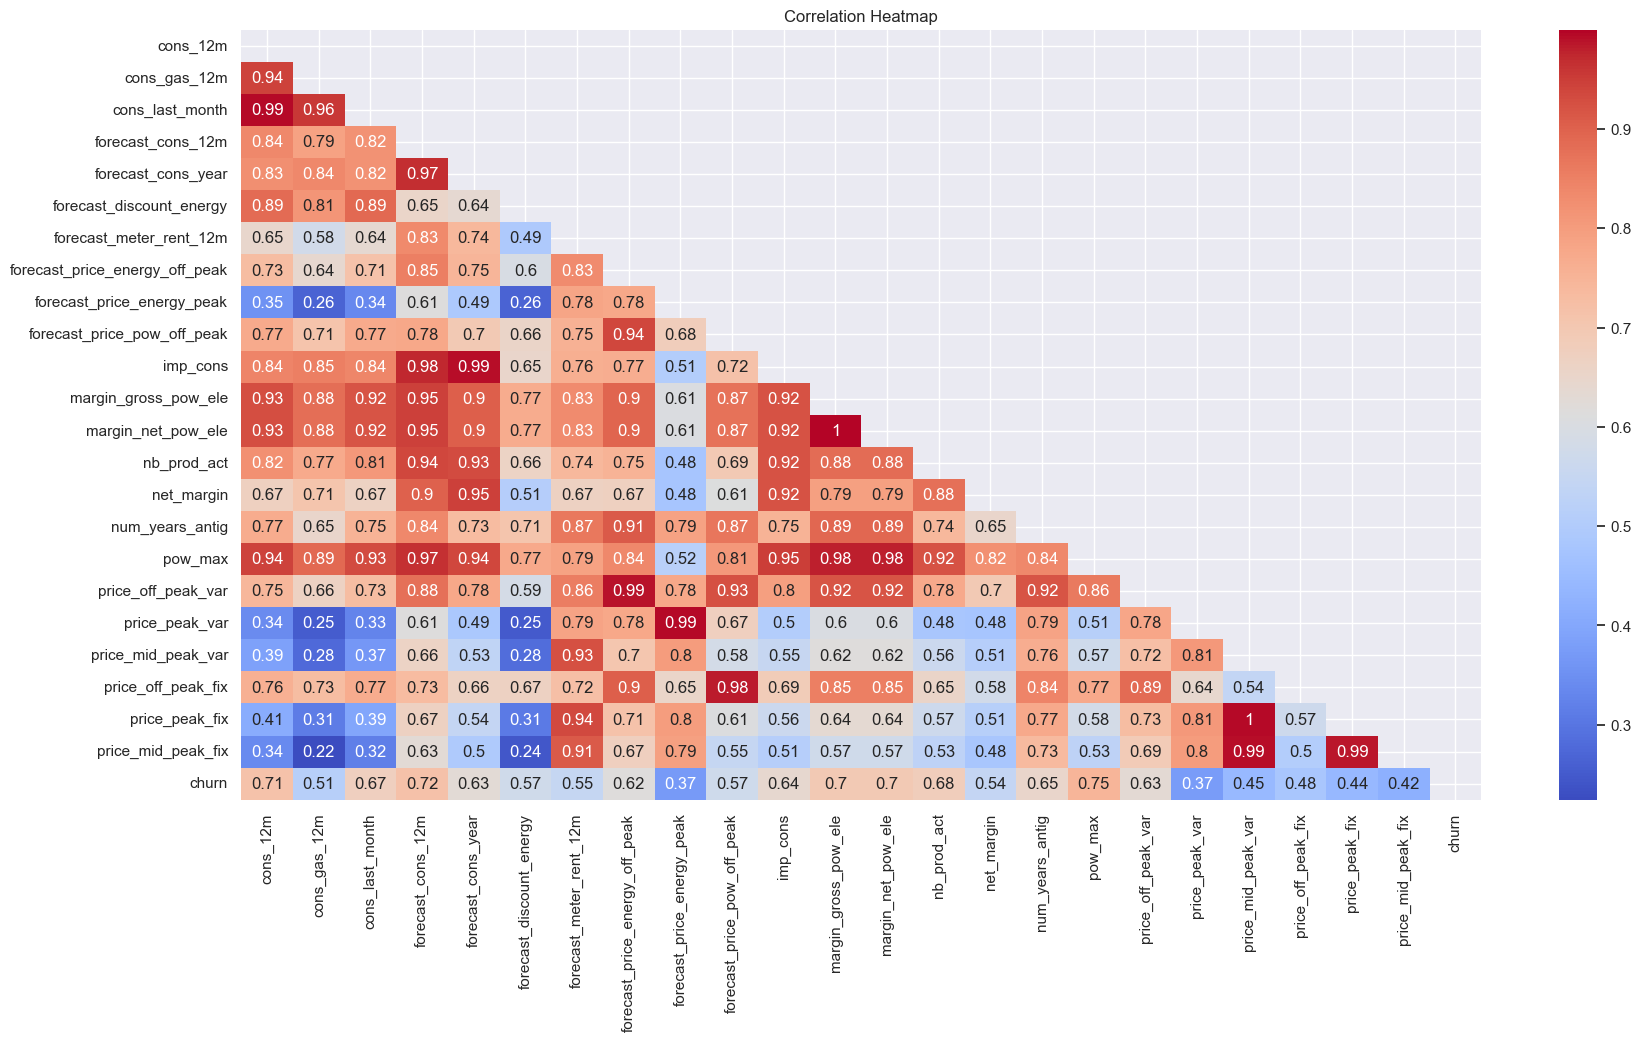

In [127]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(data_corr_df.corr(), dtype=bool))
heatmap = sns.heatmap(data_corr_df.corr(),mask = mask, annot = True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap');

Id and Churn

/var/folders/bv/54zrpjns611fgbwk4xqys0w40000gn/T/ipykernel_45071/2729595702.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="churn", kind="count", palette="ch:.25", data=data)


Text(0.5, 1.0, 'Churning Status')

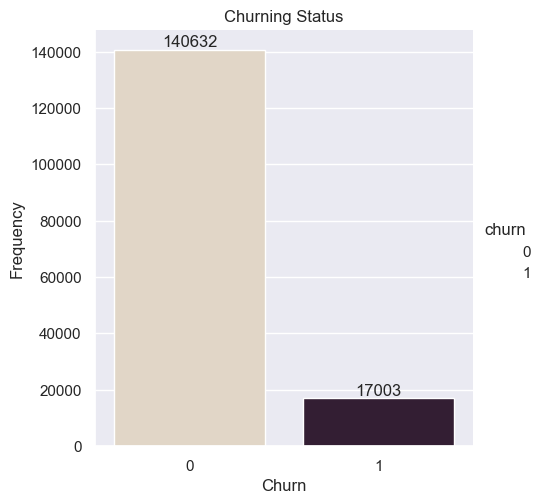

In [128]:
g = sns.catplot(x="churn", kind="count", palette="ch:.25", data=data)

# Access the current axes of the catplot
ax = g.ax

# Calculate the frequency of each category
value_counts = data['churn'].value_counts()

# Annotate the bars with their values
for i, count in enumerate(value_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
plt.ylabel('Frequency')
plt.xlabel('Churn')
plt.title('Churning Status')

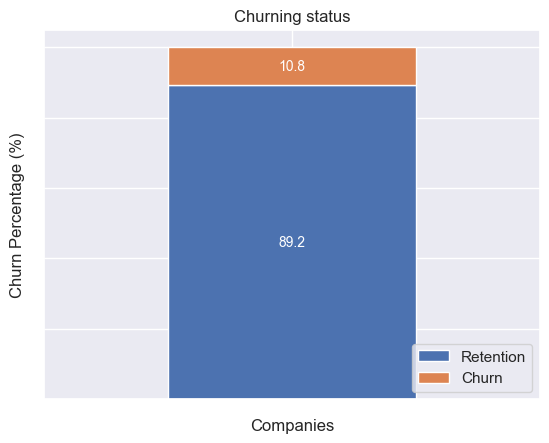

In [129]:
churn = data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn["churn"]).count() 
churn_percentage = round(churn_total/churn_total.sum()*100, 2)

ax = churn_percentage.transpose().plot(kind = 'bar',stacked=True)
plt.legend(["Retention", "Churn"],loc = 'lower right')
plt.xlabel('Companies')
plt.ylabel('Churn Percentage (%)')
plt.title('Churning status')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

Channel Sales and Churn

In [130]:
pd.DataFrame({'Frequency':data['channel_sales'].value_counts()})

,Frequency
channel_sales,
foosdfpfkusacimwkcsosbicdxkicaua,80971
MISSING,27170
lmkebamcaaclubfxadlmueccxoimlema,22105
usilxuppasemubllopkaafesmlibmsdf,16486
ewpakwlliwisiwduibdlfmalxowmwpci,10712
sddiedcslfslkckwlfkdpoeeailfpeds,131
epumfxlbckeskwekxbiuasklxalciiuu,36
fixdbufsefwooaasfcxdxadsiekoceaa,24


In [131]:
channel = data[['id', 'channel_sales', 'churn']]
channel1 = channel.groupby([channel["channel_sales"], channel["churn"]])["id"]
channel1 = channel1.count().unstack(level=1)


/var/folders/bv/54zrpjns611fgbwk4xqys0w40000gn/T/ipykernel_45071/4089864607.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel1 = channel.groupby([channel["channel_sales"], channel["churn"]])["id"]


In [132]:
channel_churn = (channel1.div(channel1.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

In [133]:
channel_churn

churn,0,1
channel_sales,,
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,100.000000
usilxuppasemubllopkaafesmlibmsdf,0.000000,100.000000
lmkebamcaaclubfxadlmueccxoimlema,98.253789,1.746211
MISSING,100.000000,0.000000
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
ewpakwlliwisiwduibdlfmalxowmwpci,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
foosdfpfkusacimwkcsosbicdxkicaua,100.000000,0.000000


In [134]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"): 
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(kind="bar", stacked=True, figsize=size_, rot=rot_, title=title_)
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_) # Labels
    plt.ylabel("Company base (%)")
    plt.show()
    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(),1)) # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
                ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad), color=colour,
                size=textsize,
               )

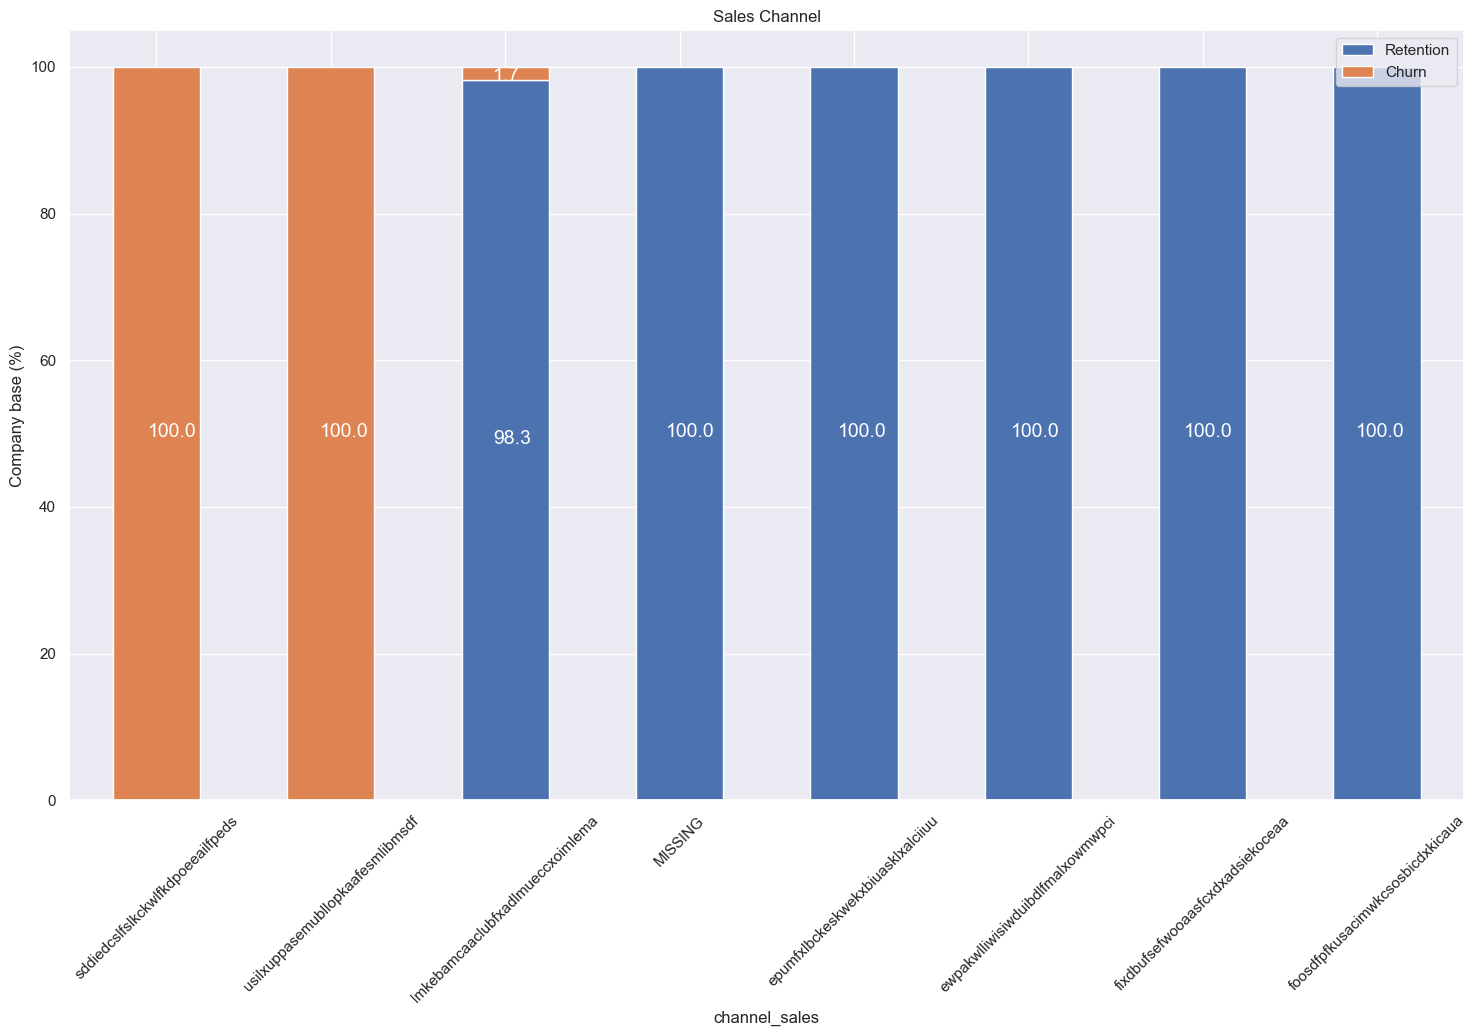

In [135]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_=45)


CONSUMPTION

In [136]:
consumption = data[['id','cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]
consumption.head(3)

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,1935a9d77fff27952d0874a0db3999e0,2524,0,0,0.0,f,0
1,1935a9d77fff27952d0874a0db3999e0,2524,0,0,0.0,f,0
2,1935a9d77fff27952d0874a0db3999e0,2527,0,0,0.0,f,0


In [137]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                         "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True) # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

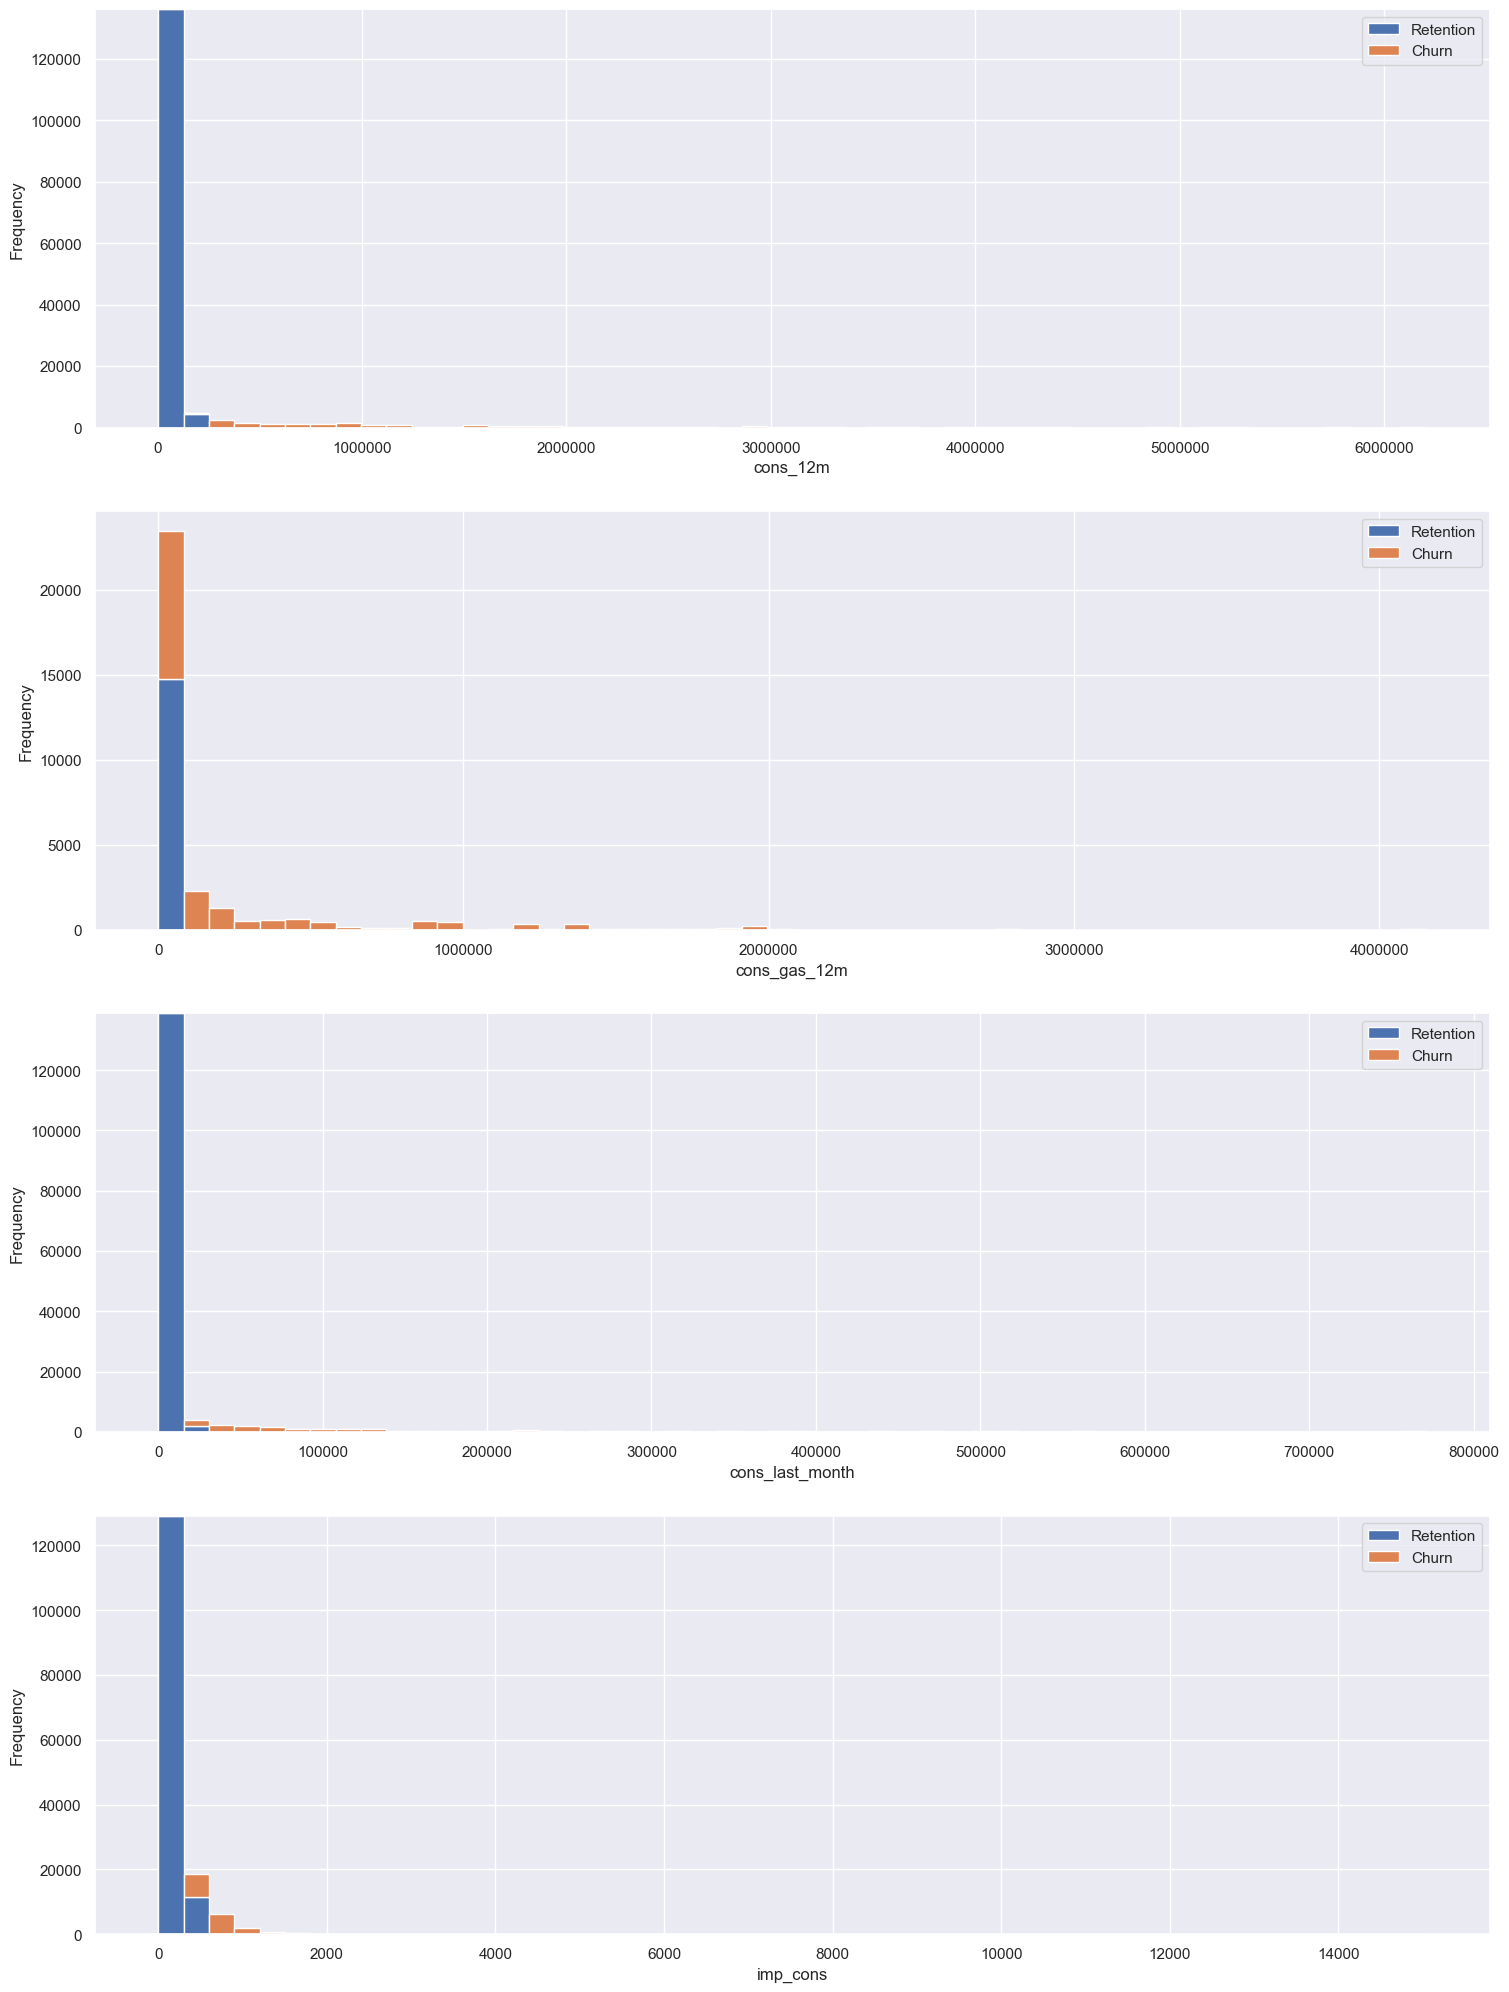

In [138]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] == "t"],"cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

In [139]:
fil_rows = consumption[(consumption['cons_12m']<=1000000) & (consumption['churn'] == 0)]

In [140]:
consumption['cons_12m'].max()

6207104

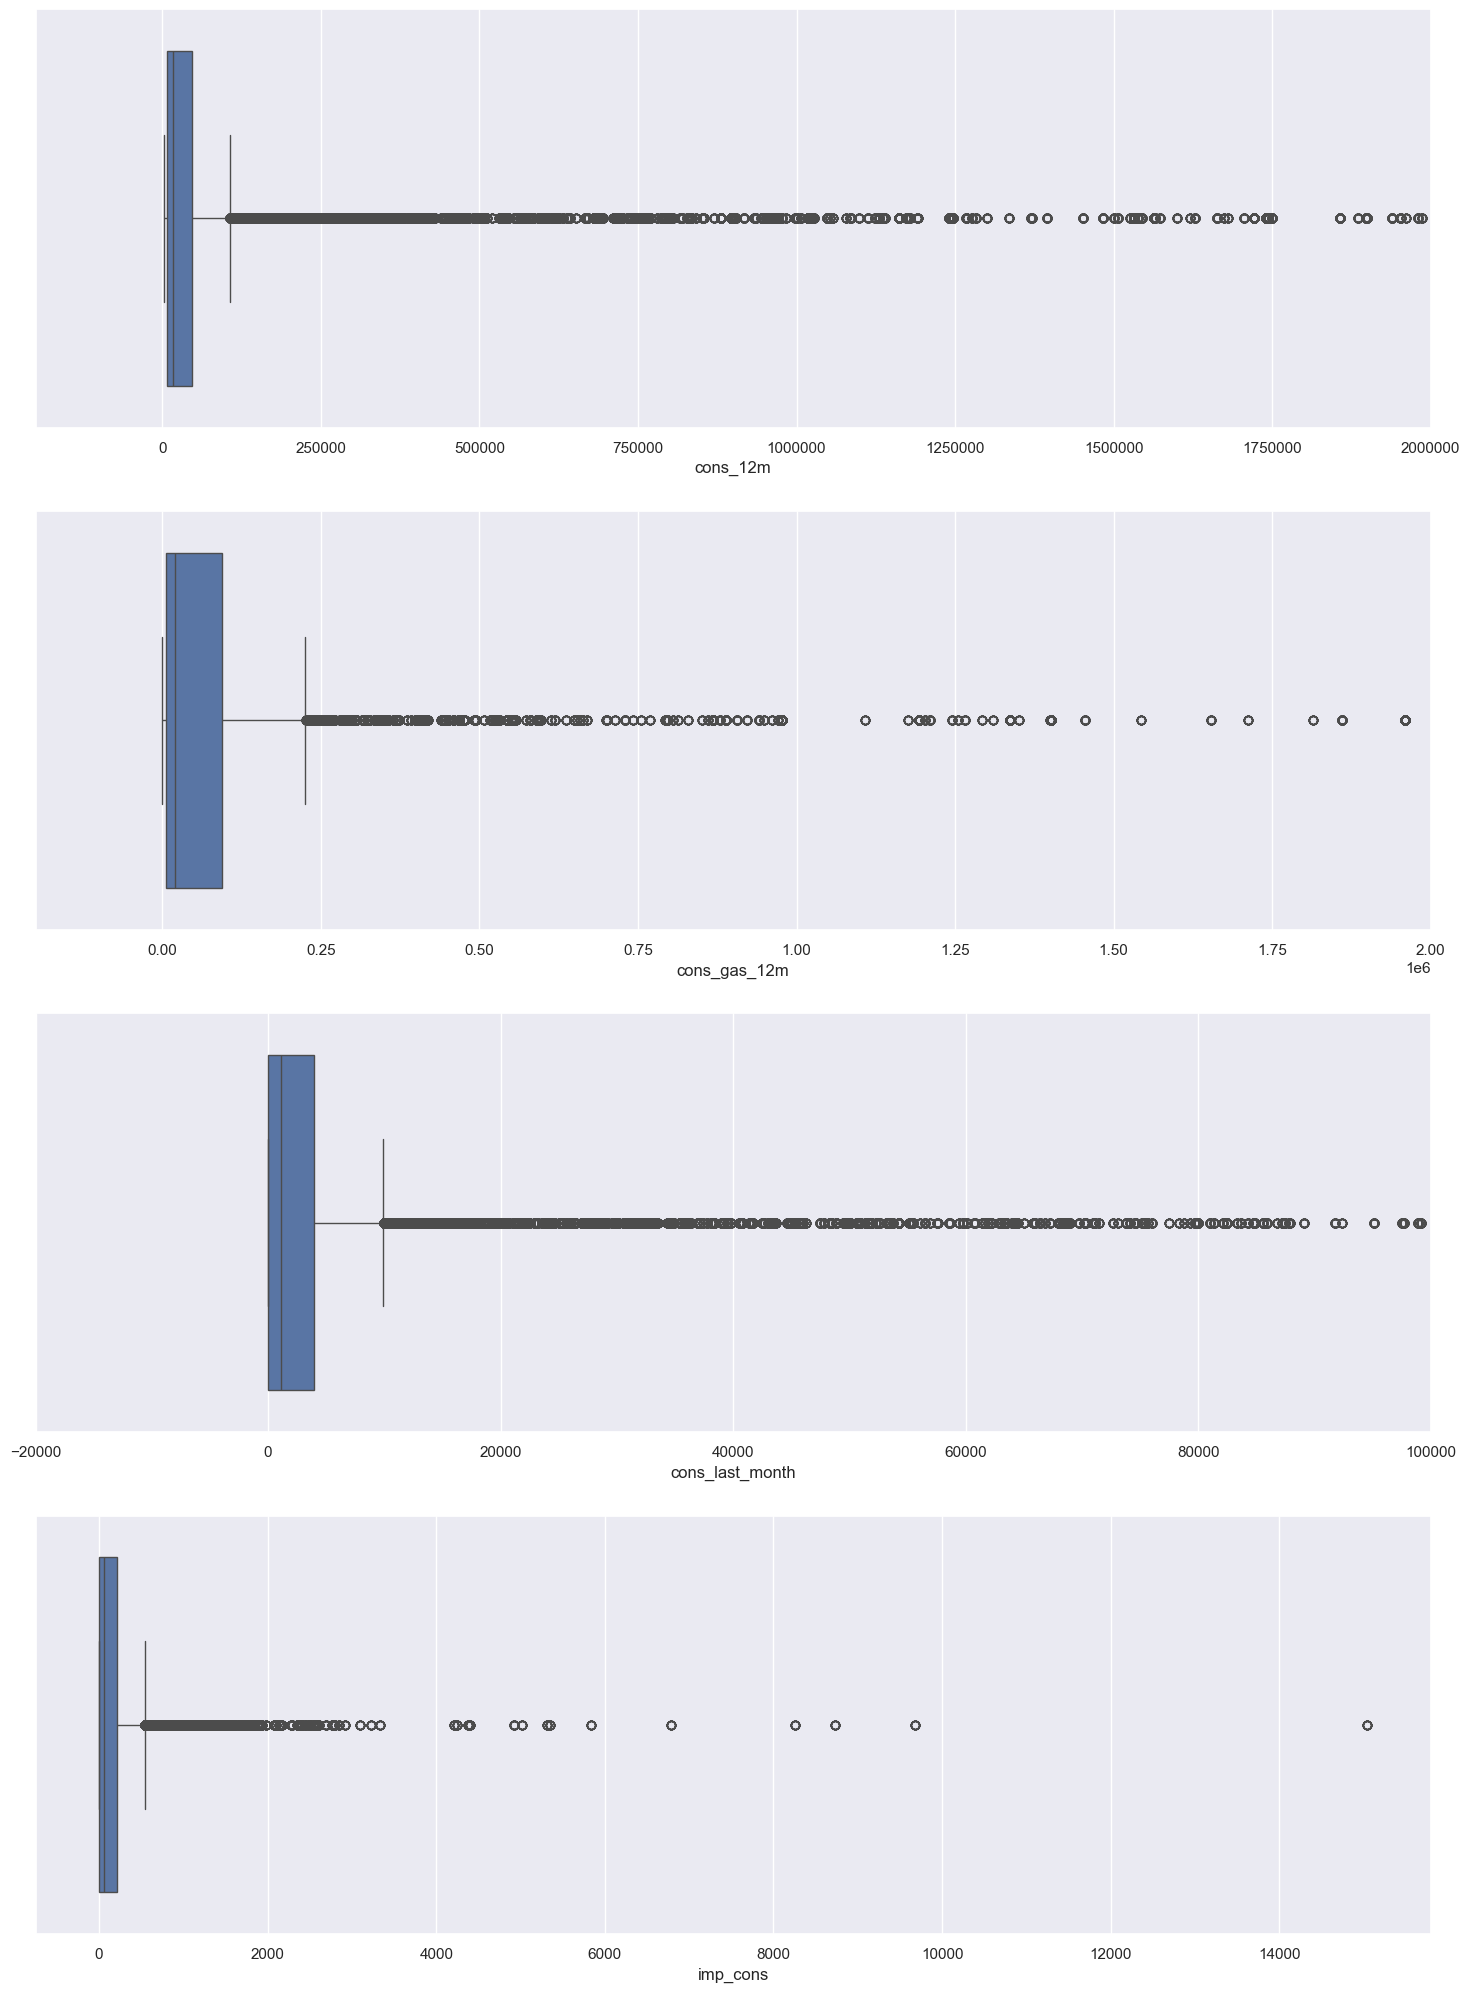

In [141]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(x=consumption["cons_12m"], ax=axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2])
sns.boxplot(x=consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

Text(0.5, 1.0, 'Churn status of clients depending on if they are also gas clients')

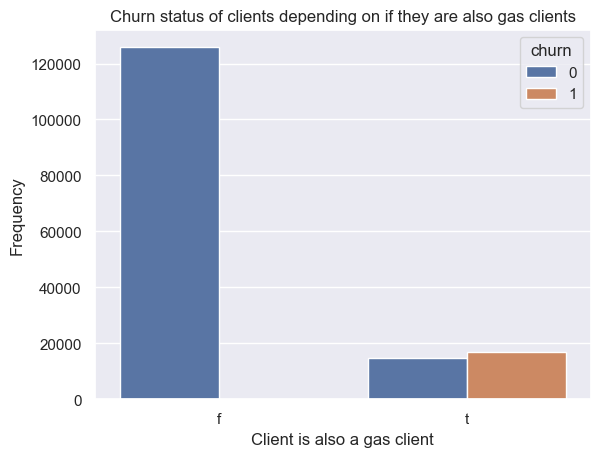

In [142]:
sns.countplot(x="has_gas",hue='churn', data=data)
plt.xlabel('Client is also a gas client')
plt.ylabel('Frequency')
plt.title('Churn status of clients depending on if they are also gas clients')

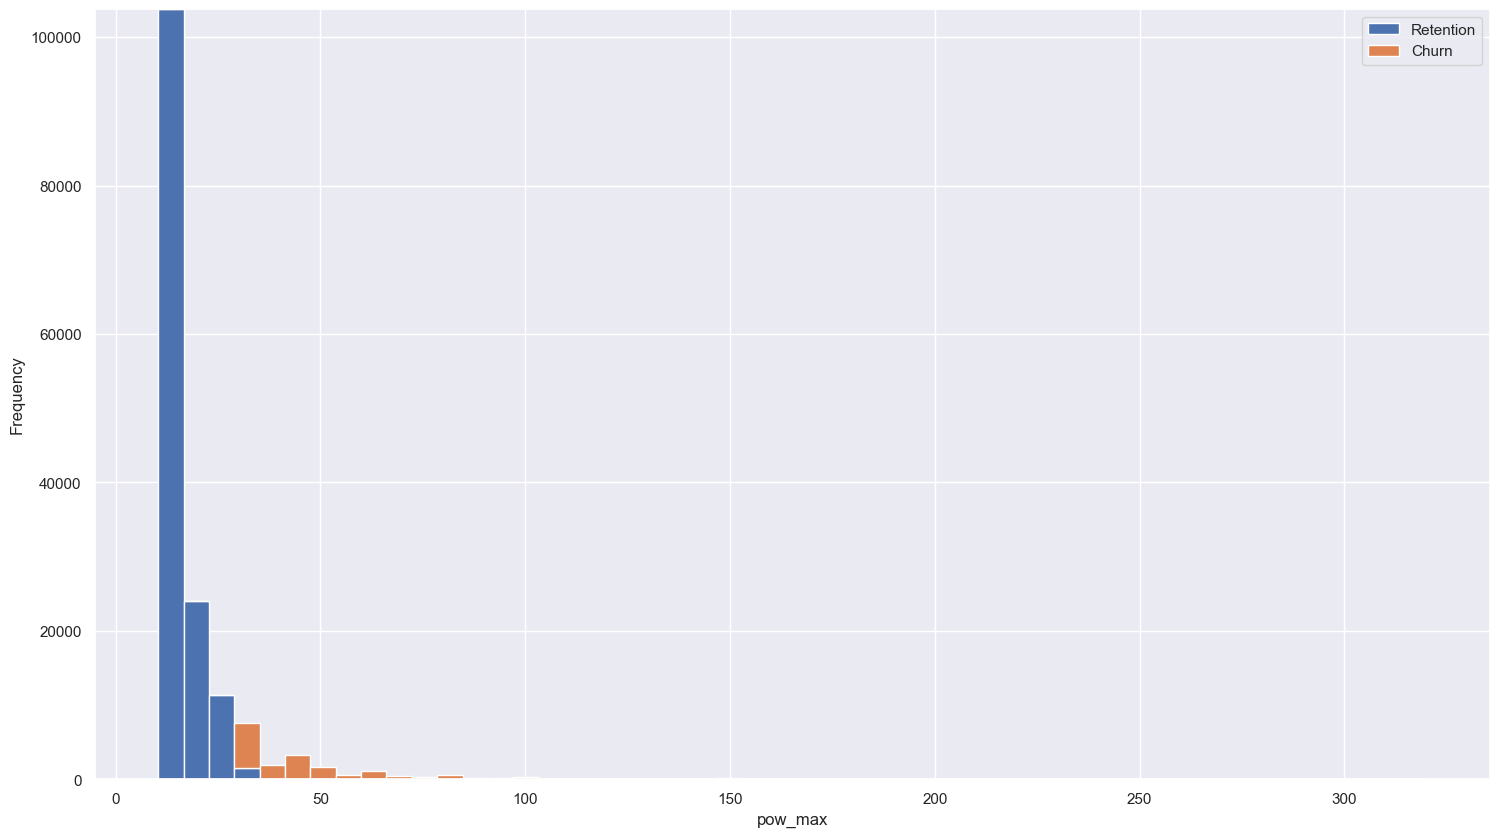

In [143]:
power = data[["id","pow_max", "churn"]]
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

Number of active products and services

In [144]:
others = data[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

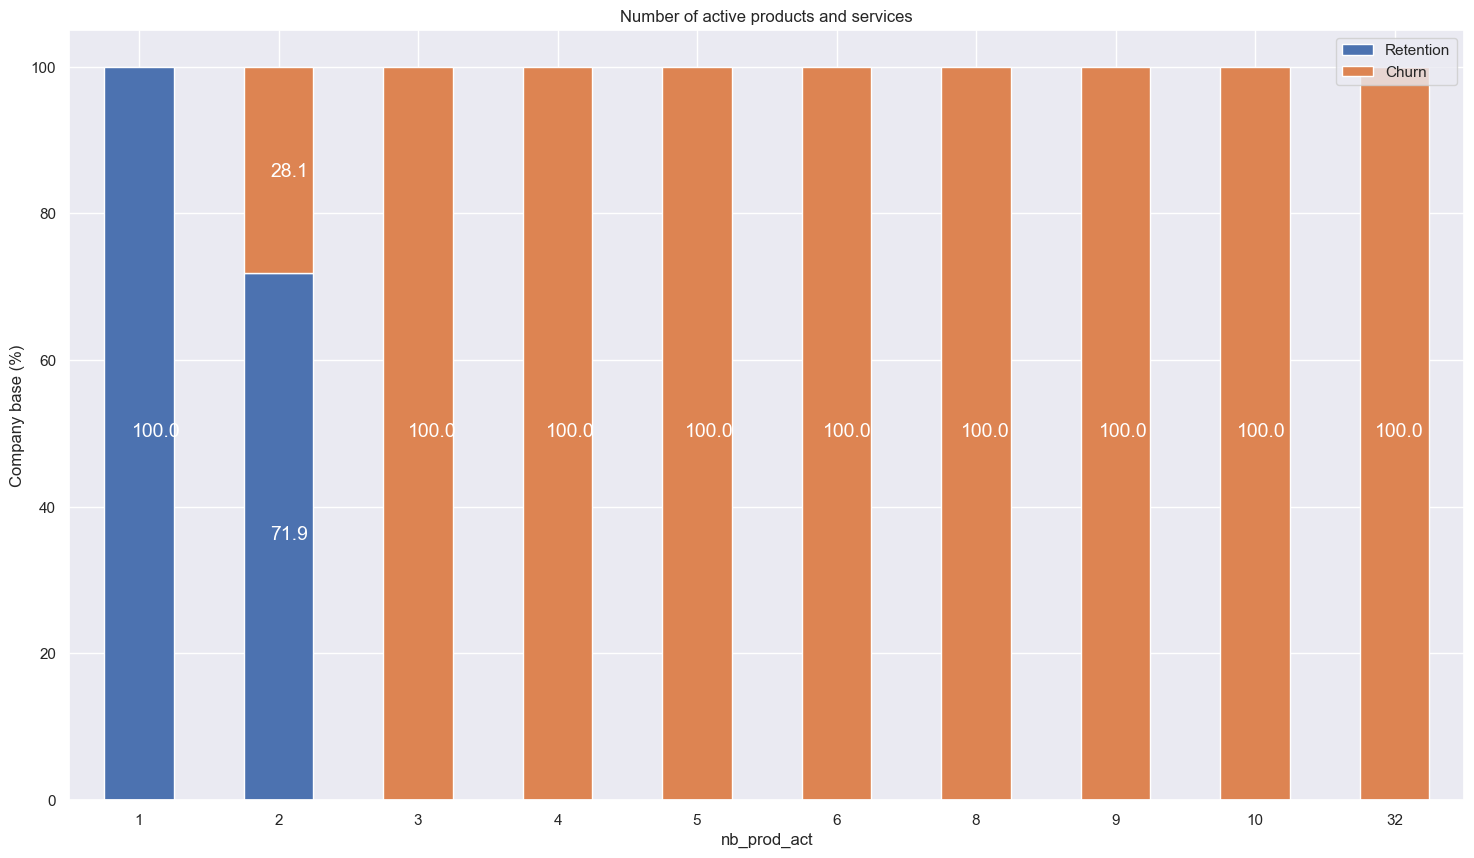

In [145]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[0], ascending=False)
plot_stacked_bars(products_percentage, "Number of active products and services")

Antiquity of the client (in number of years)

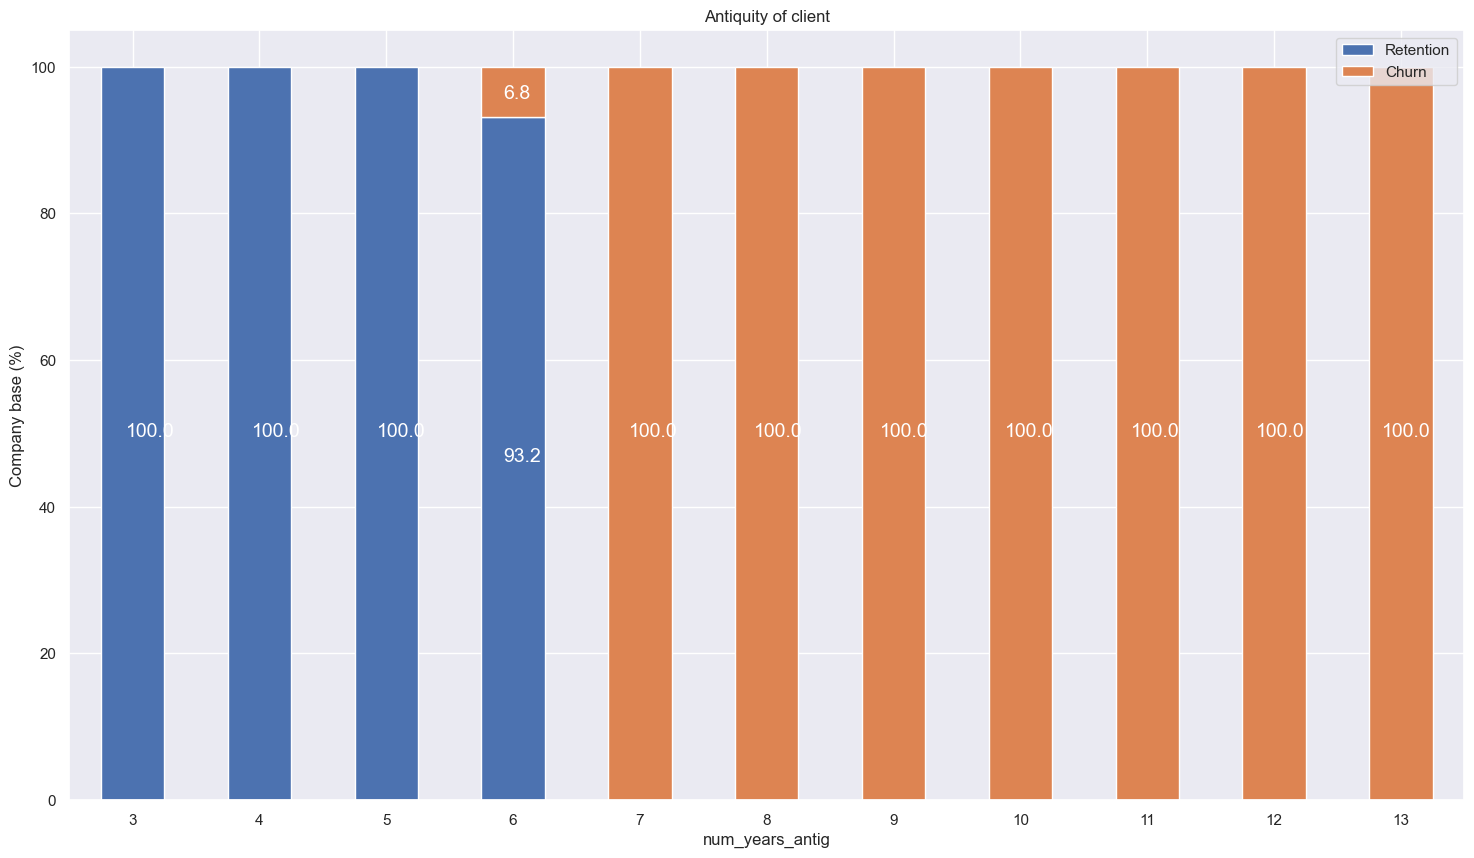

In [146]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Antiquity of client")

Electricity campaign the customer first subscribed to

/var/folders/bv/54zrpjns611fgbwk4xqys0w40000gn/T/ipykernel_45071/411979291.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)


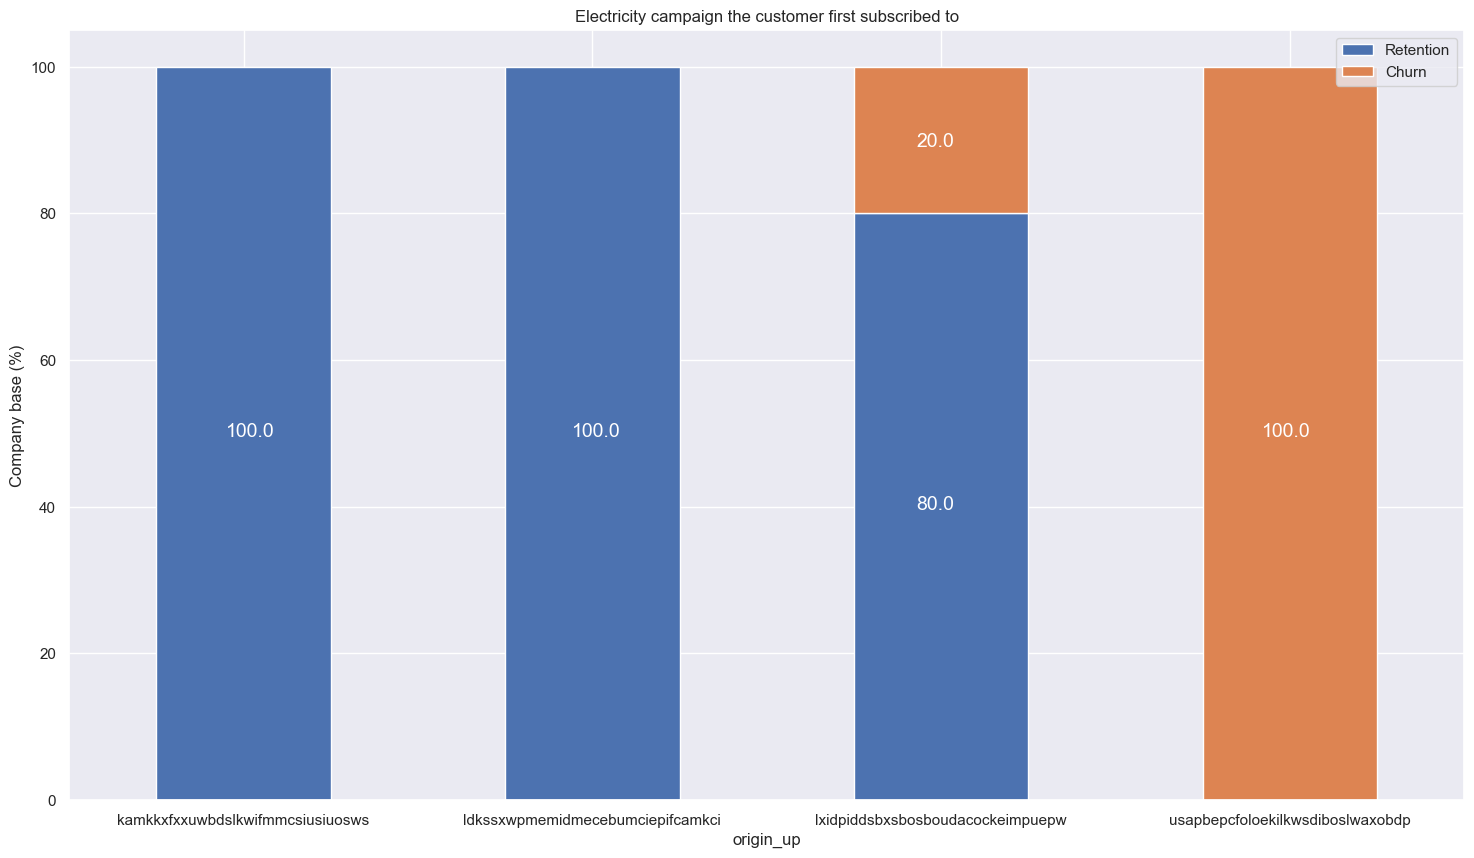

In [147]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Electricity campaign the customer first subscribed to")

Forecast

In [148]:
forecast = data[['forecast_cons_12m','forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak','id','churn']]

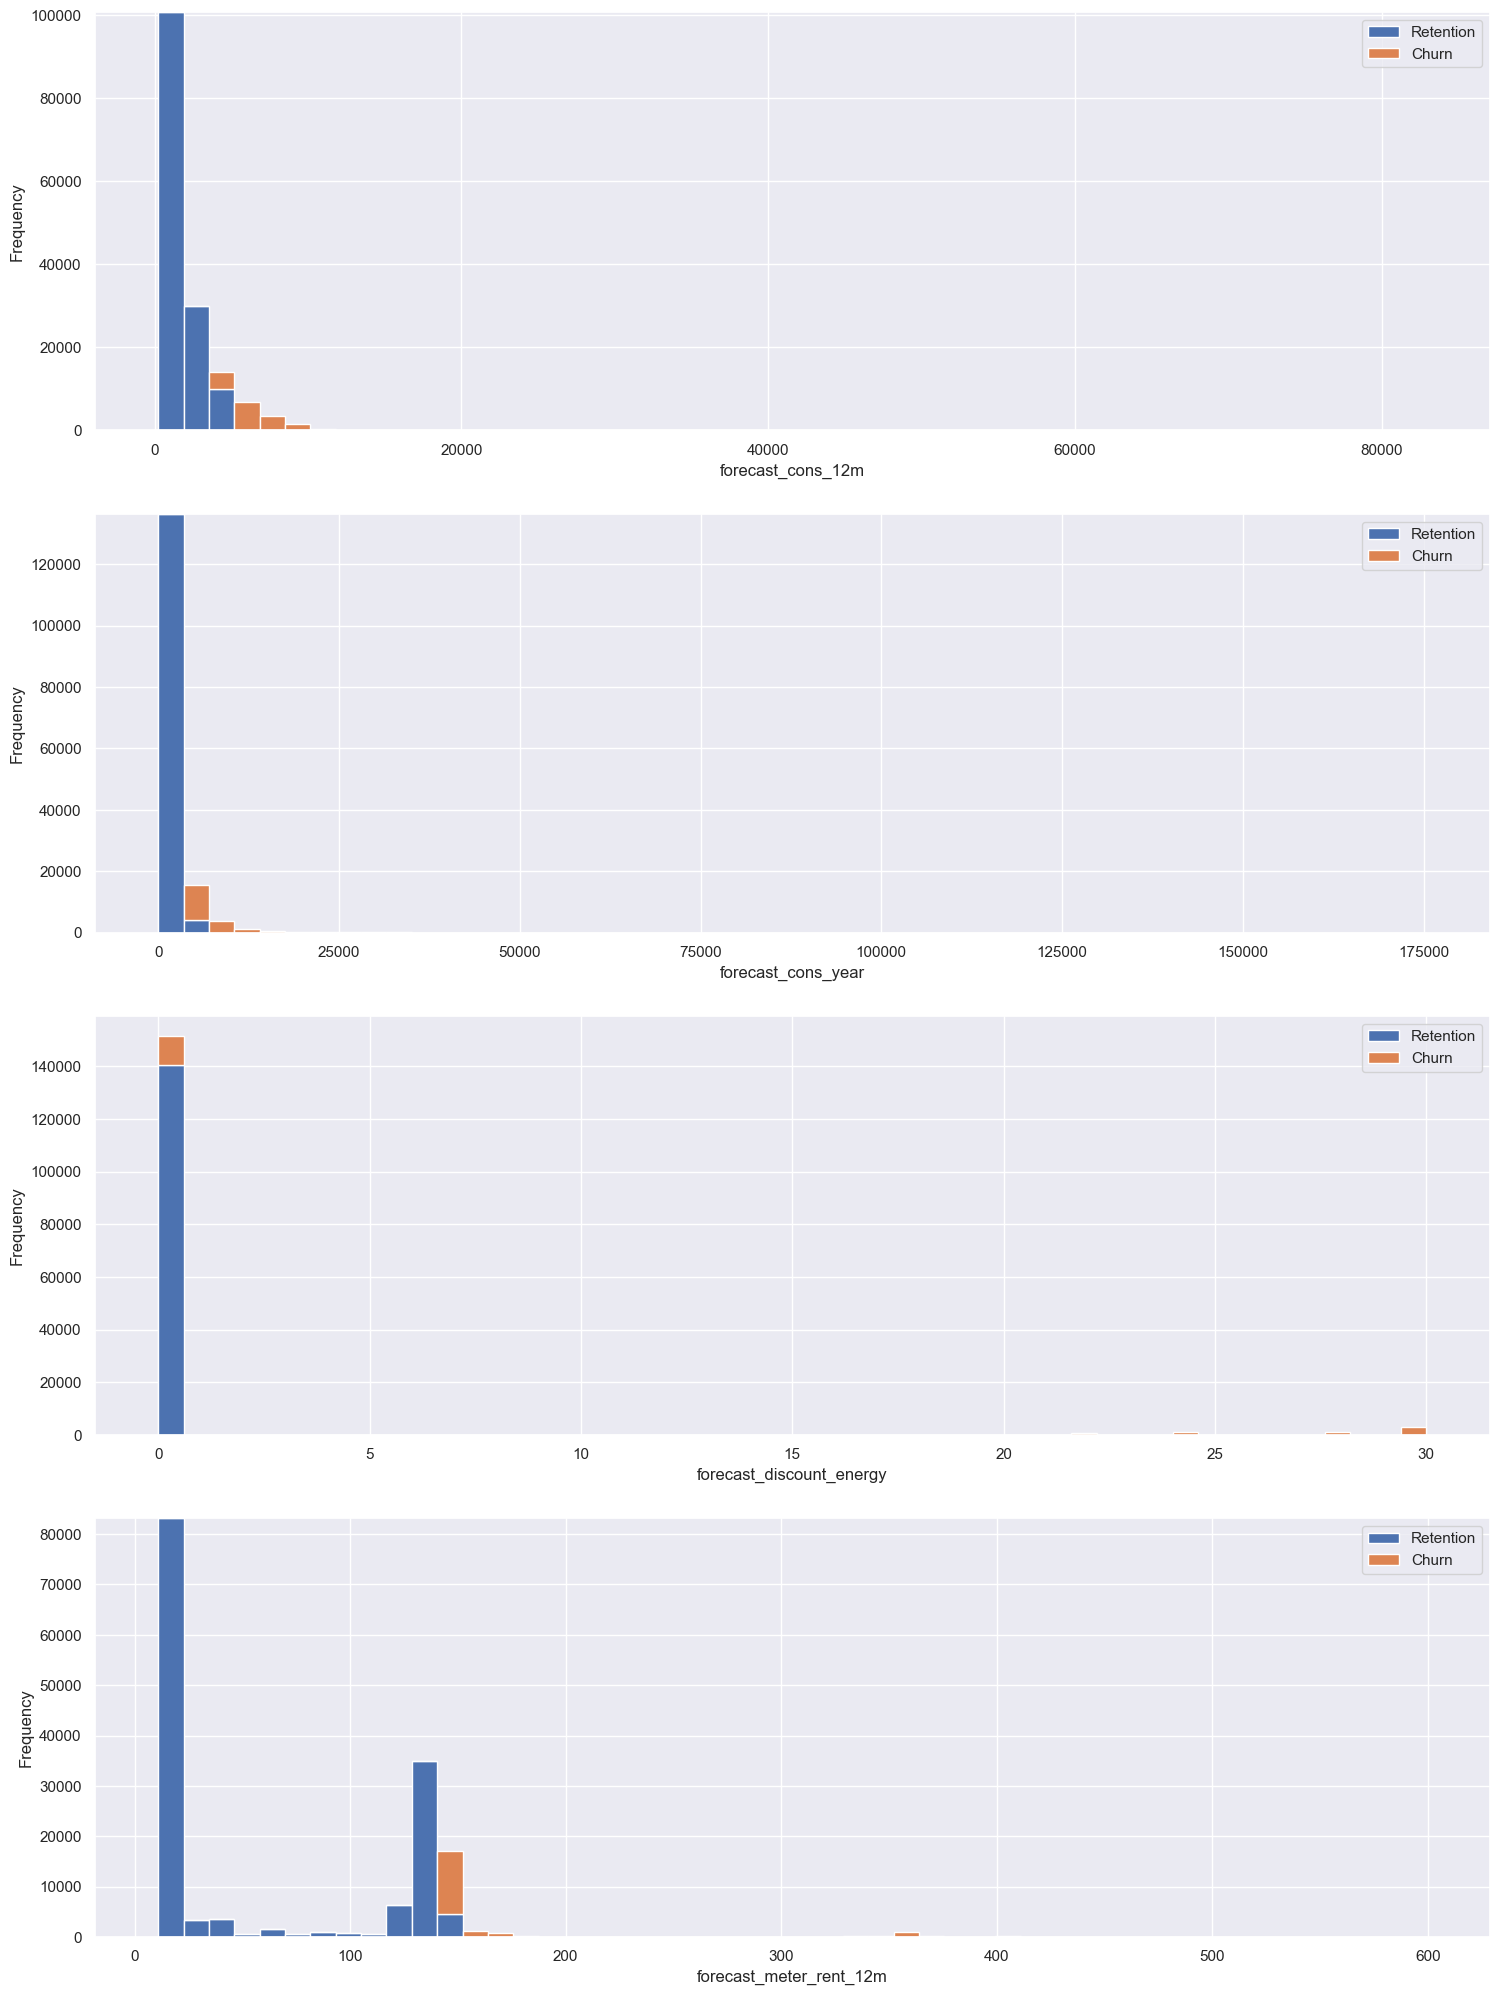

In [149]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(forecast, "forecast_cons_12m", axs[0])
plot_distribution(forecast, "forecast_cons_year", axs[1])
plot_distribution(forecast, "forecast_discount_energy", axs[2])
plot_distribution(forecast, "forecast_meter_rent_12m", axs[3])

Price of Energy and Customer Churn

Text(0.5, 1.0, 'Boxplot of energy price for customers in the 1st period')

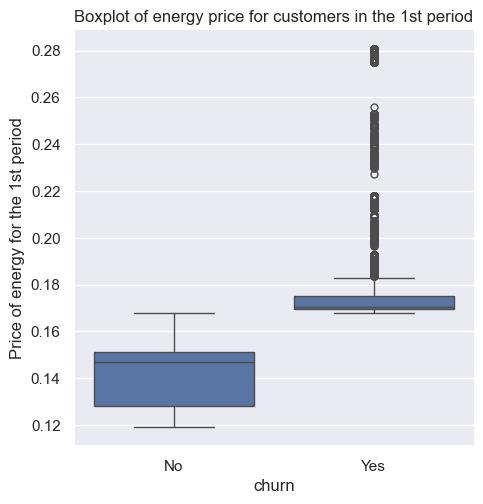

In [150]:
sns.catplot(x="churn", y="price_off_peak_var", kind="box", data=data)
plt.ylabel('Price of energy for the 1st period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of energy price for customers in the 1st period')

Text(0.5, 1.0, 'Boxplot of energy price for customers in the 2nd period')

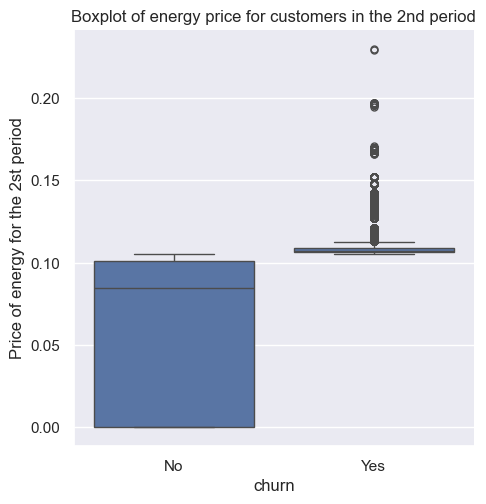

In [151]:
sns.catplot(x="churn", y="price_peak_var", kind="box", data=data)
plt.ylabel('Price of energy for the 2st period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of energy price for customers in the 2nd period')

Text(0.5, 1.0, 'Boxplot of energy price for customers in the 3rd period')

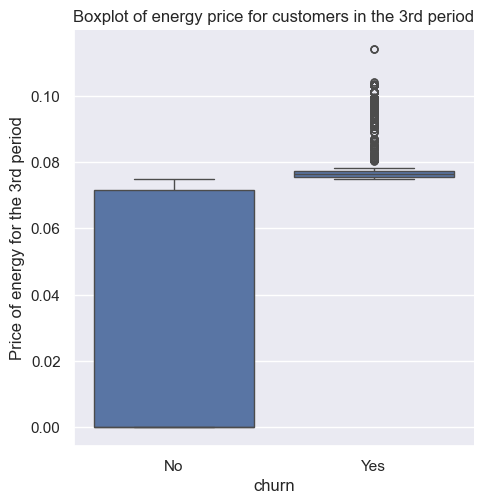

In [152]:
sns.catplot(x="churn", y="price_mid_peak_var", kind="box", data=data)
plt.ylabel('Price of energy for the 3rd period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of energy price for customers in the 3rd period')

Price of Power and Customer Churn

Text(0.5, 1.0, 'Boxplot of power price for customers in the 1st period')

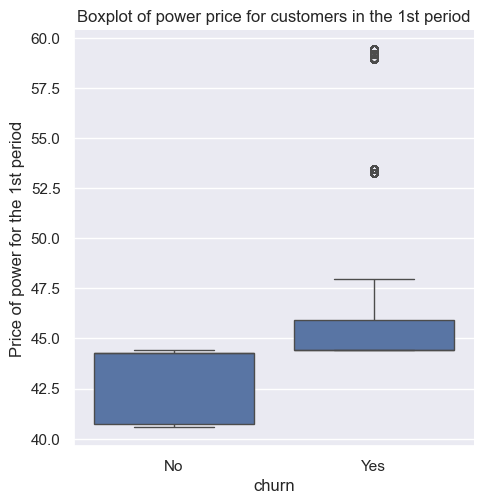

In [153]:
sns.catplot(x="churn", y="price_off_peak_fix", kind="box", data=data)
plt.ylabel('Price of power for the 1st period')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Boxplot of power price for customers in the 1st period')